In [0]:
!git clone https://github.com/TheMrGhostman/Semi-supervised-Learning-with-VAE.git

fatal: destination path 'Semi-supervised-Learning-with-VAE' already exists and is not an empty directory.


In [0]:
import os
os.chdir("Semi-supervised-Learning-with-VAE")

In [1]:
import numpy as np 
import torch 
import torch.nn as nn
import torch.nn.functional as F 
import matplotlib.pyplot as plt


In [9]:
import matplotlib
from matplotlib import rc
matplotlib.rcParams.update({'font.size': 22})
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)

In [10]:
model = torch.load("models_and_losses/CNN-VAE_ReLU_NLL_lr-{1e-3,1e-4}_bs-512_epoch-300.pt")

In [11]:
decoder = model.decoder

In [12]:
decoder

Sequential(
  (0): Linear(in_features=15, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=1152, bias=True)
  (3): Reshape()
  (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): ConvTranspose1d(64, 32, kernel_size=(4,), stride=(2,))
  (7): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU()
  (9): ConvTranspose1d(32, 16, kernel_size=(4,), stride=(2,))
  (10): ReLU()
  (11): ConvTransposeDecoderOutput(
    (mu): ConvTranspose1d(16, 1, kernel_size=(6,), stride=(2,))
    (rho): Linear(in_features=1248, out_features=1, bias=True)
    (flatten): Flatten()
    (flatten_mu): Flatten()
    (softplus): Softplus(beta=1, threshold=20)
  )
)

In [13]:
x = torch.randn(1,15).cuda()

In [14]:
mu, sigma = decoder(x)
mu = mu.cpu().detach().numpy()
sigma = sigma.cpu().detach().numpy()

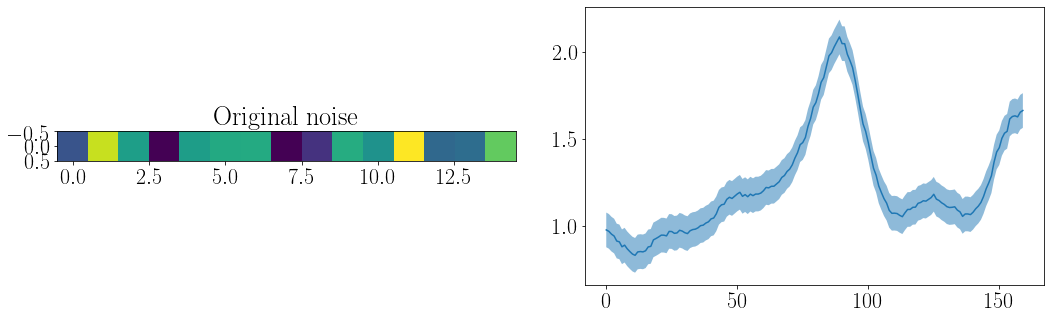

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.tight_layout()

axes[0].imshow(x.cpu().numpy())
axes[0].set_title('Original noise')
#axes[i][1].plot(X_hat[i])
axes[1].plot(mu[0])
axes[1].fill_between(np.arange(160), mu[0] + 2 * sigma[0], mu[0] - 2 * sigma[0], alpha = 0.5, label="Uncertainty")

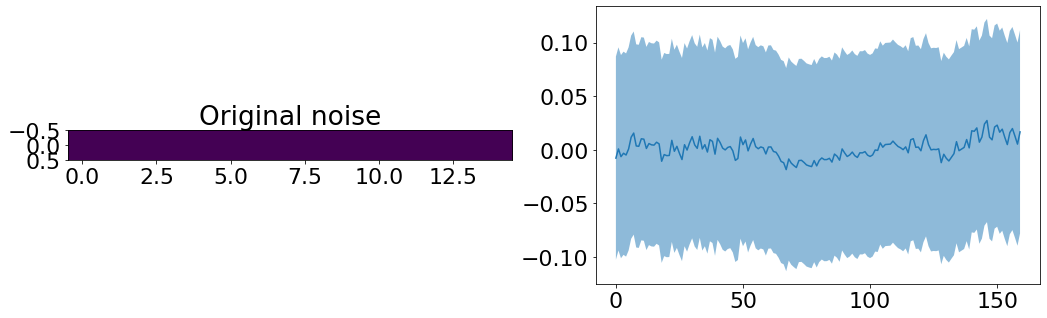

In [9]:
x = torch.zeros(1,15).cuda()

mu, sigma = decoder(x)
mu = mu.cpu().detach().numpy()
sigma = sigma.cpu().detach().numpy()

fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.tight_layout()

axes[0].imshow(x.cpu().numpy())
axes[0].set_title('Original noise')
#axes[i][1].plot(X_hat[i])
axes[1].plot(mu[0])
axes[1].fill_between(np.arange(160), mu[0] + 2 * sigma[0], mu[0] - 2 * sigma[0], alpha = 0.5, label="Uncertainty")

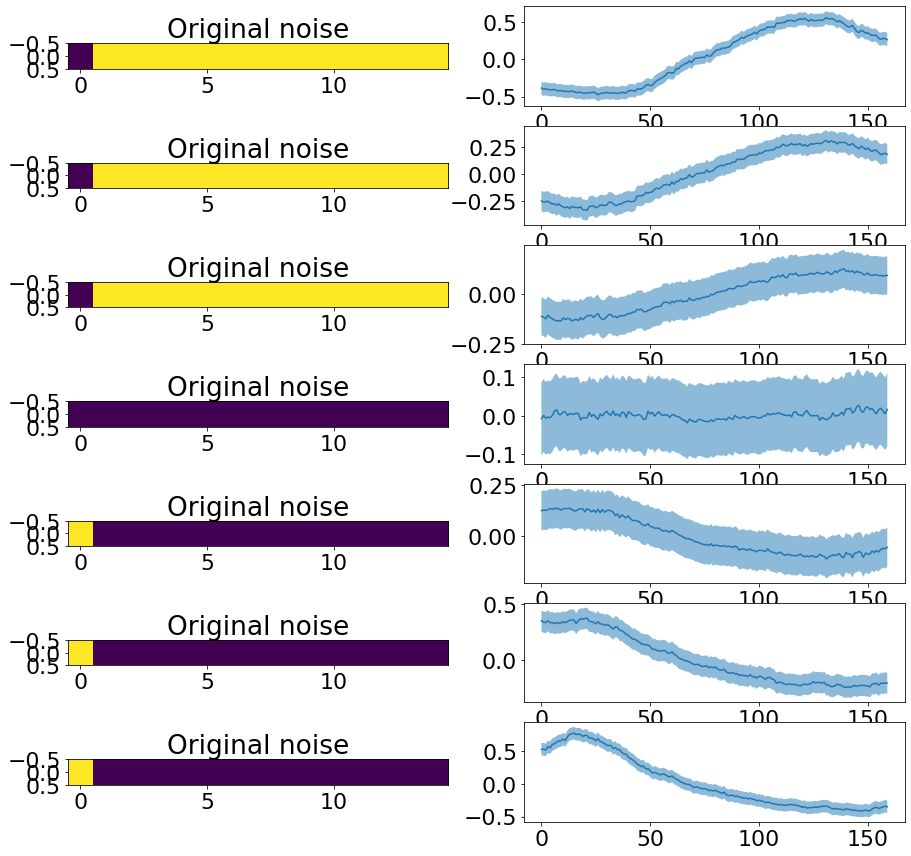

In [10]:
x = torch.zeros(1,15).cuda()

ig, axes = plt.subplots(7, 2, figsize=(15,15))
fig.tight_layout()

for i,j in enumerate([-3,-2,-1,0,1,2,3]):

    x[0, 0] = j
    mu, sigma = decoder(x)
    mu = mu.cpu().detach().numpy()
    sigma = sigma.cpu().detach().numpy()


    axes[i][0].imshow(x.cpu().numpy())
    axes[i][0].set_title('Original noise')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu[0])
    axes[i][1].fill_between(np.arange(160), mu[0] + 2 * sigma[0], mu[0] - 2 * sigma[0], alpha = 0.5, label="Uncertainty")
plt.show()

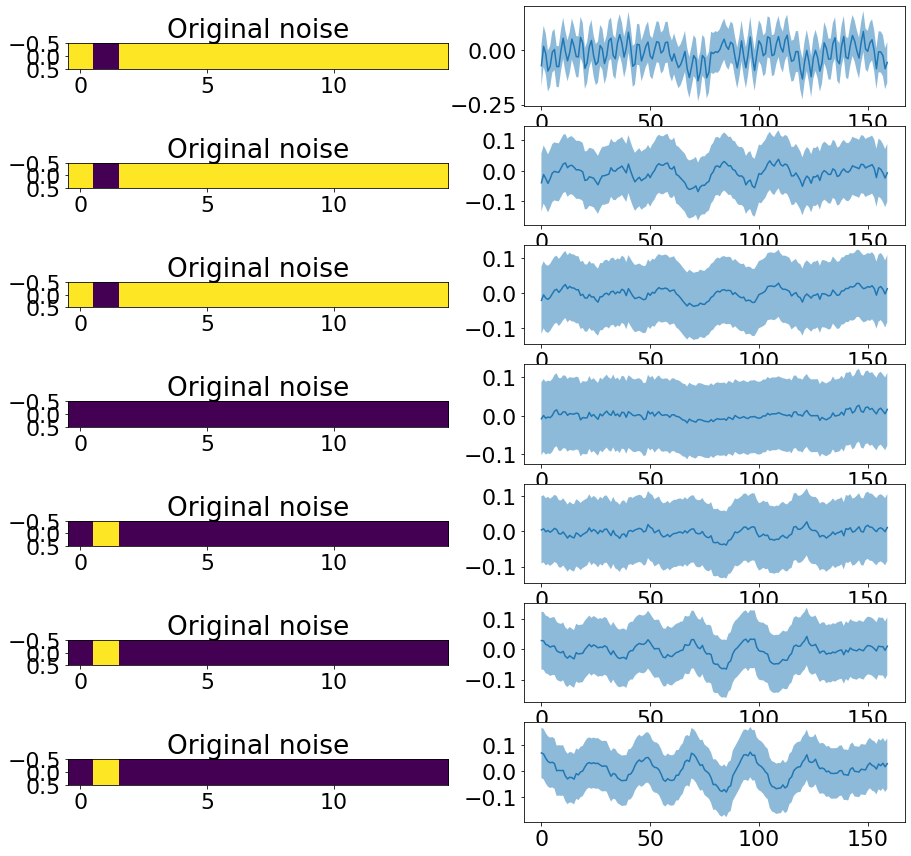

In [11]:
x = torch.zeros(1,15).cuda()

ig, axes = plt.subplots(7, 2, figsize=(15,15))
fig.tight_layout()

for i,j in enumerate([-3,-2,-1,0,1,2,3]):

    x[0, 1] = j
    mu, sigma = decoder(x)
    mu = mu.cpu().detach().numpy()
    sigma = sigma.cpu().detach().numpy()


    axes[i][0].imshow(x.cpu().numpy())
    axes[i][0].set_title('Original noise')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu[0])
    axes[i][1].fill_between(np.arange(160), mu[0] + 2 * sigma[0], mu[0] - 2 * sigma[0], alpha = 0.5, label="Uncertainty")
plt.show()

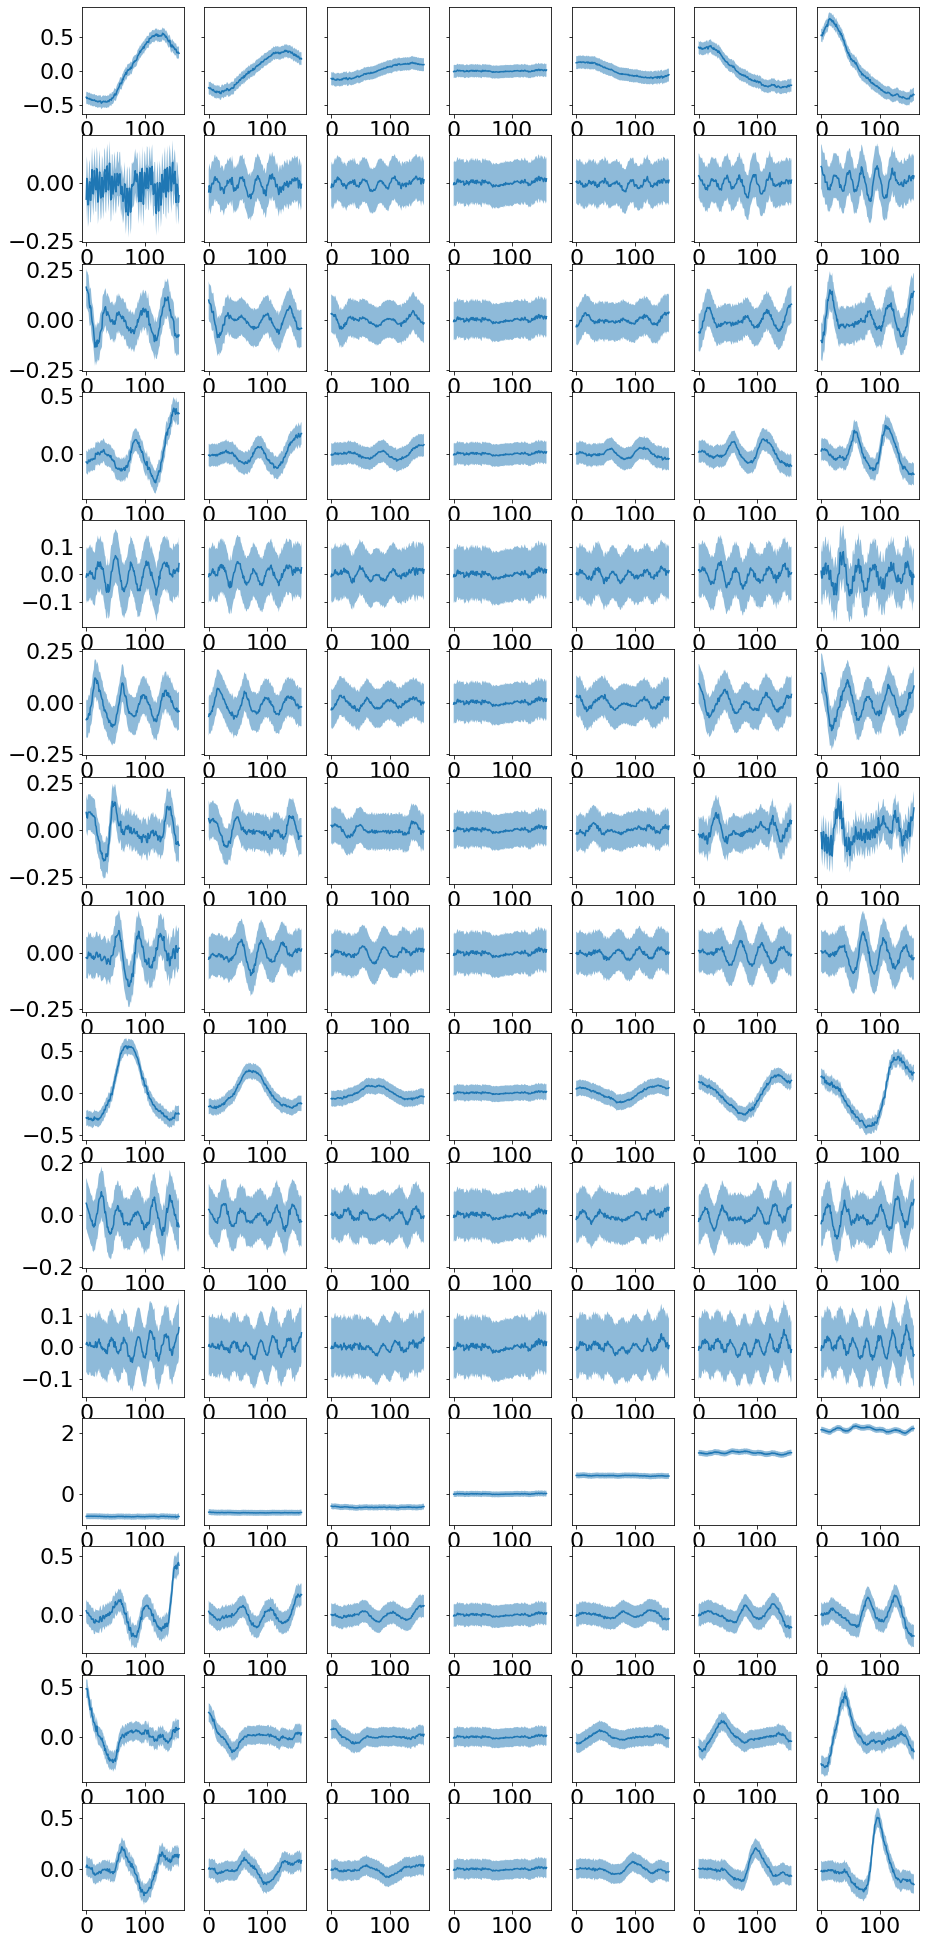

In [12]:
x = torch.zeros(1,15).cuda()

ig, axes = plt.subplots(15, 7, figsize=(15,35), sharey="row")
fig.tight_layout()

for k in range(15):
    x = torch.zeros(1,15).cuda()
    for i,j in enumerate([-3,-2,-1,0,1,2,3]):

        x[0, k] = j
        mu, sigma = decoder(x)
        mu = mu.cpu().detach().numpy()
        sigma = sigma.cpu().detach().numpy()

        axes[k][i].plot(mu[0])
        axes[k][i].fill_between(np.arange(160), mu[0] + 2 * sigma[0], mu[0] - 2 * sigma[0], alpha = 0.5, label="Uncertainty")
plt.show()

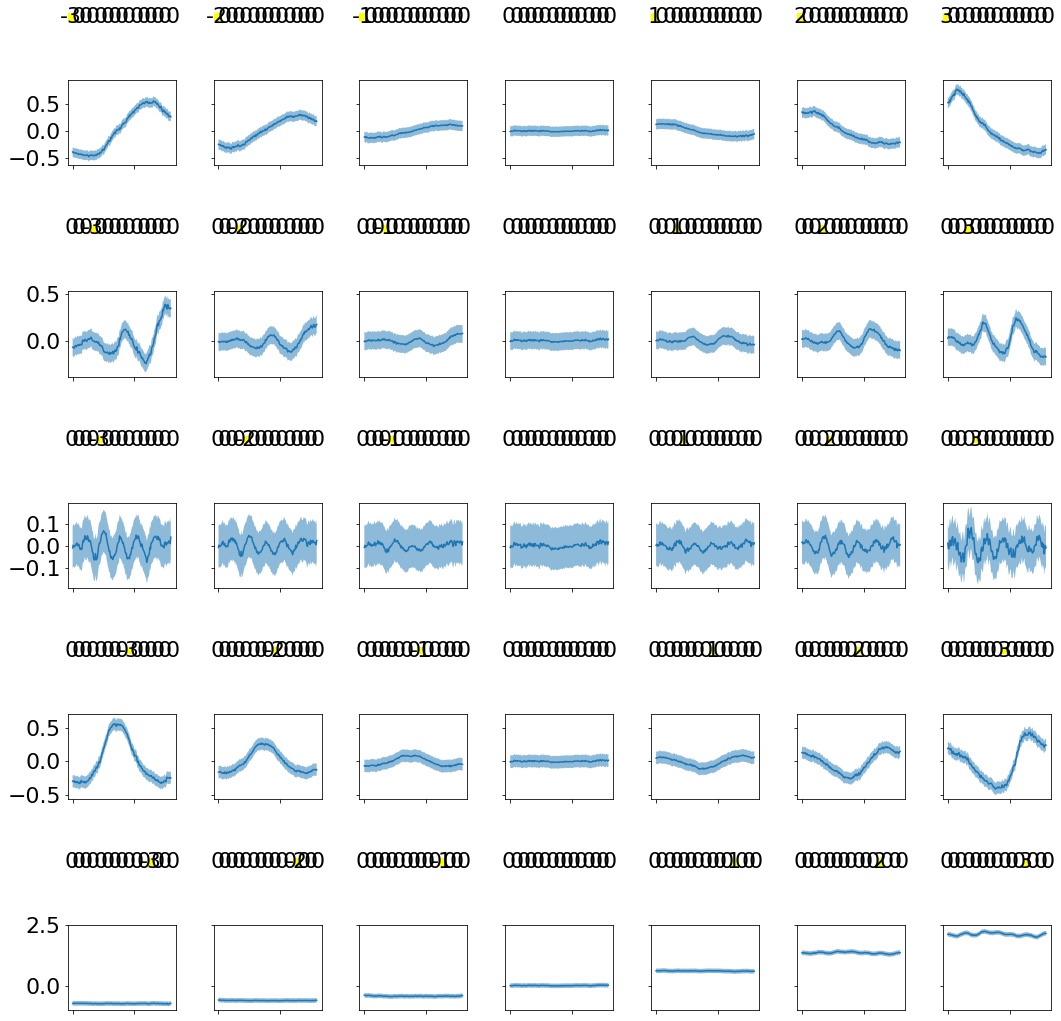

In [13]:
from matplotlib.colors import ListedColormap
"""
cmap_dic = {"-3": ListedColormap([(102/255, 153/255, 0),(1,1,1)]),#ListedColormap([(0,0,1), (1,1,1)]), 
            "-2": ListedColormap([(153/255, 255/255, 51/255),(1,1,1)]),#ListedColormap([(0,153/255,1), (1,1,1)]),
            "-1": ListedColormap([(204/255, 255/255, 51/255),(1,1,1)]),#ListedColormap([(0,1,1), (1,1,1)]),
            "0" : ListedColormap([(1,1,1), (1,0.5,0)]),
            "1" : ListedColormap([(1,1,1), (1,1,0)]),
            "2" : ListedColormap([(1,1,1), (1,153/255,0)]),
            "3" : ListedColormap([(1,1,1), (255/255, 102/255, 51/255)])
            }
"""
#just white matrix
cmap_dic = {"-3": ListedColormap([(1,1,0), (1,1,1)]),#ListedColormap([(0,0,1), (1,1,1)]), 
            "-2": ListedColormap([(1,1,0), (1,1,1)]),#ListedColormap([(0,153/255,1), (1,1,1)]),
            "-1": ListedColormap([(1,1,0), (1,1,1)]),#ListedColormap([(0,1,1), (1,1,1)]),
            "0" : ListedColormap([(1,1,1),(1,1,1)]),
            "1" : ListedColormap([(1,1,1), (1,1,0)]),
            "2" : ListedColormap([(1,1,1), (1,1,0)]),
            "3" : ListedColormap([(1,1,1), (1,1,0)])
            }



x = torch.zeros(1,15).cuda()

cmap = ListedColormap([(1,1,1), (1,0.5,0)])

fig, axes = plt.subplots(10, 7, figsize=(15,15), sharey="row", gridspec_kw={'height_ratios': [0.05,0.5]*5}) #, gridspec_kw={'height_ratios': [0.7,1]*5}
fig.tight_layout()

for l,k in enumerate([0, 3, 4, 8, 11]):
    x = torch.zeros(1,15).cuda()
    for i,j in enumerate([-3,-2,-1,0,1,2,3]):
        x[0, k] = j
        mu, sigma = decoder(x)
        mu = mu.cpu().detach().numpy()
        sigma = sigma.cpu().detach().numpy()

        cmap = cmap_dic[str(j)]
        axes[2*l][i].matshow(x.cpu().numpy(), cmap=cmap)
        #axes[2*l][i].set_title("vstup")

        for m in range(15):
            for n in range(1):
                c = int(x.cpu().numpy()[n,m])
                axes[2*l][i].text(m, n, str(c), va='center', ha='center')
        axes[2*l][i].axis("off")

        #axes[2*l+1][i].set_title("výstup")

        axes[2*l+1][i].plot(mu[0])
        axes[2*l+1][i].fill_between(np.arange(160), mu[0] + 2 * sigma[0], mu[0] - 2 * sigma[0], alpha = 0.5)#, label=f"{x.cpu().numpy()[0]}" )
        axes[2*l+1][i].set_xticklabels([])
        #axes[2*l+1][i].legend("upper right")

#plt.savefig("latent_space_effects4.pdf", format="pdf")       
plt.show()

In [6]:
matplotlib.rcParams.update({'font.size': 22})
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


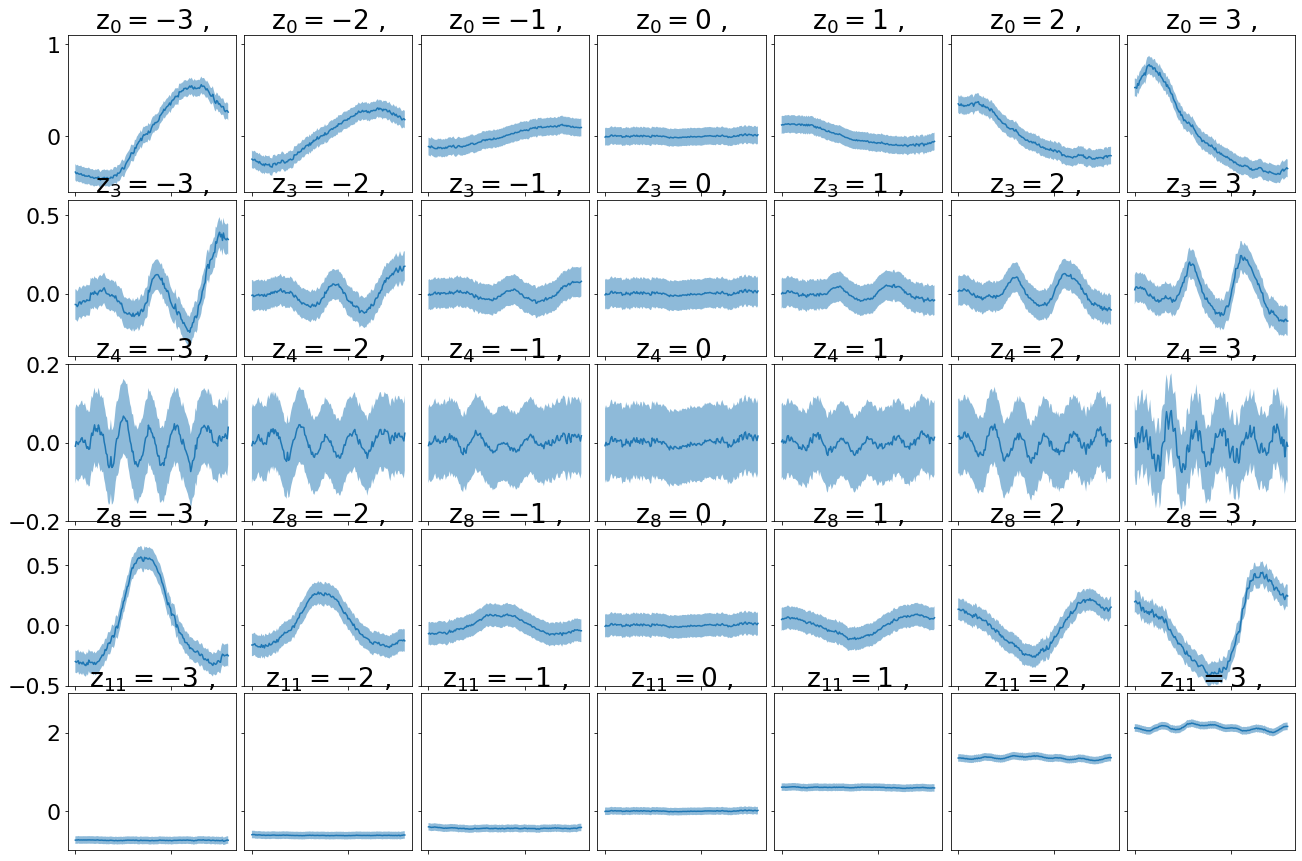

In [7]:
from matplotlib.colors import ListedColormap

x = torch.zeros(1,15).cuda()

cmap = ListedColormap([(1,1,1), (1,0.5,0)])

fig, axes = plt.subplots(5, 7, figsize=(22,15), sharey="row")#, gridspec_kw={'height_ratios': [0.05,0.5]*5}) #, gridspec_kw={'height_ratios': [0.7,1]*5}
#fig.tight_layout()
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for l,k in enumerate([0, 3, 4, 8, 11]):
    x = torch.zeros(1,15).cuda()
    for i,j in enumerate([-3,-2,-1,0,1,2,3]):
        x[0, k] = j
        mu, sigma = decoder(x)
        mu = mu.cpu().detach().numpy()
        sigma = sigma.cpu().detach().numpy()

        axes[l][i].plot(mu[0])
        axes[l][i].fill_between(np.arange(160), mu[0] + 2 * sigma[0], mu[0] - 2 * sigma[0], alpha = 0.5)#, label=f"{x.cpu().numpy()[0]}" )
        axes[l][i].set_xticklabels([])
        axes[l][i].title.set_text(f'z$_{{{k}}}={{{j}}} $ ,')

        x_str = ""
        for mm in range(15):
            if mm==k:
                x_str += f"{j}"
            else:
                x_str+="0"
            if mm<14:
                x_str+=","
        if l==0:
            axes[l][i].set_ylim((-0.6,1.1))
        elif l==1:
            axes[l][i].set_ylim((-0.4,0.6))
        elif l ==2:
            axes[l][i].set_ylim((-0.2,0.2))
        elif l ==3:
            axes[l][i].set_ylim((-0.5,0.8))
        elif l ==4:
            axes[l][i].set_ylim((-1.0,3.0))
        #axes[l][i].text(.5,.9, r'z = $\{$'+x_str+r"$\}$", horizontalalignment='center', transform=axes[l][i].transAxes)

#plt.savefig("latent_space_effects_new_version_proper.pdf", format="pdf")       
plt.show()

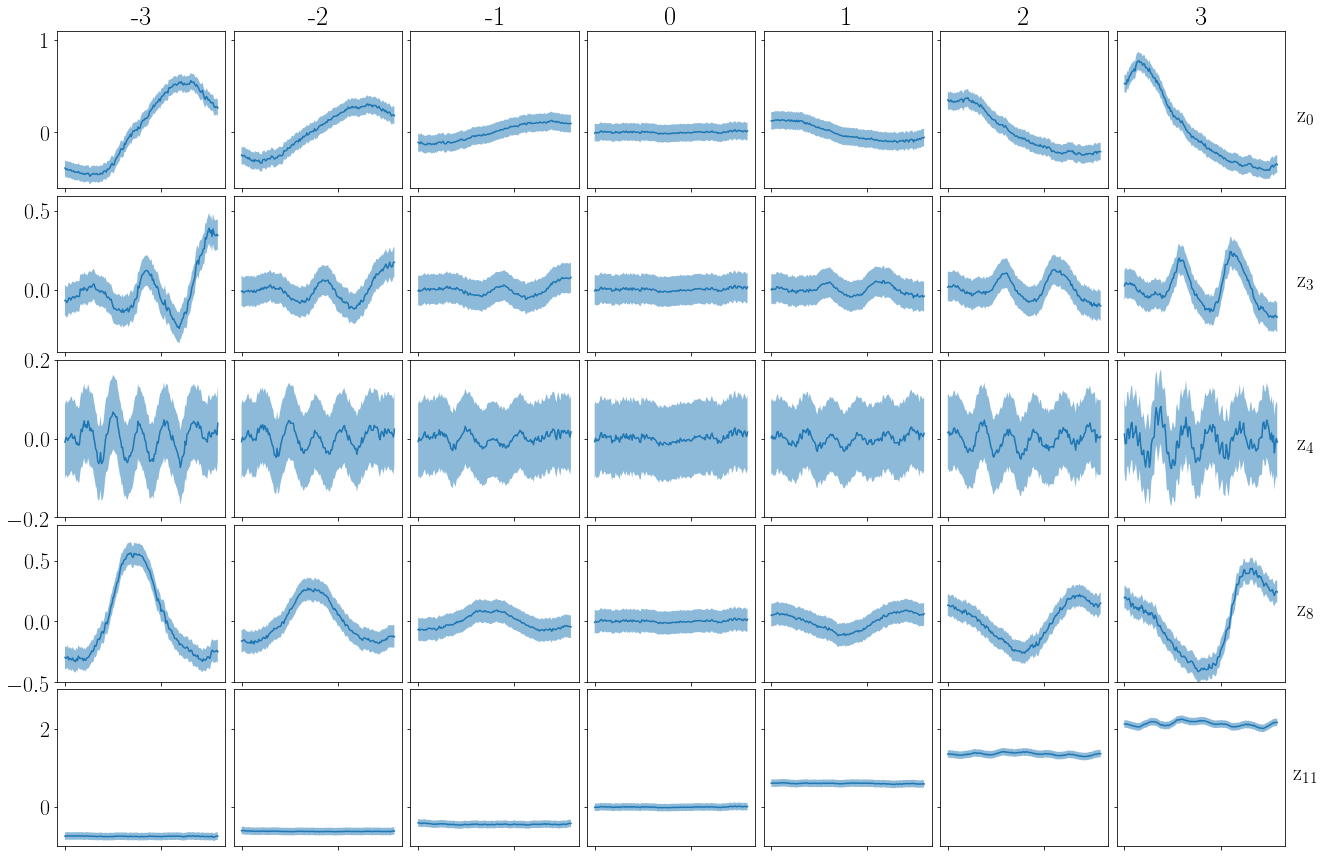

In [43]:
from matplotlib.colors import ListedColormap

x = torch.zeros(1,15).cuda()

cmap = ListedColormap([(1,1,1), (1,0.5,0)])

fig, axes = plt.subplots(5, 7, figsize=(22,15), sharey="row")#, gridspec_kw={'height_ratios': [0.05,0.5]*5}) #, gridspec_kw={'height_ratios': [0.7,1]*5}
#fig.tight_layout()
fig.subplots_adjust(hspace=0.05, wspace=0.05)#0.05
for l,k in enumerate([0, 3, 4, 8, 11]):
    x = torch.zeros(1,15).cuda()
    for i,j in enumerate([-3,-2,-1,0,1,2,3]):
        x[0, k] = j
        mu, sigma = decoder(x)
        mu = mu.cpu().detach().numpy()
        sigma = sigma.cpu().detach().numpy()

        axes[l][i].plot(mu[0])
        axes[l][i].fill_between(np.arange(160), mu[0] + 2 * sigma[0], mu[0] - 2 * sigma[0], alpha = 0.5)#, label=f"{x.cpu().numpy()[0]}" )
        axes[l][i].set_xticklabels([])
        if l ==0:
            axes[l][i].title.set_text(f'{j}')
        #axes[l][i].title.set_text(f'z$_{{{k}}}={{{j}}} $ ,')
        if i ==6:
            axes[l][i].set_ylabel(f"z$_{{{k}}}$", rotation=0, labelpad=20)
            axes[l][i].yaxis.set_label_position("right")

        x_str = ""
        for mm in range(15):
            if mm==k:
                x_str += f"{j}"
            else:
                x_str+="0"
            if mm<14:
                x_str+=","
        if l==0:
            axes[l][i].set_ylim((-0.6,1.1))
            #axes[l][i].yaxis.set_ticks(np.round(np.linspace(-0.5, 1.0, 4),1))
        elif l==1:
            axes[l][i].set_ylim((-0.4,0.6))
            #axes[l][i].yaxis.set_ticks(np.round(np.linspace(-0.3,0.5, 4),1))
        elif l ==2:
            axes[l][i].set_ylim((-0.2,0.2))
            #axes[l][i].yaxis.set_ticks(np.round(np.linspace(-0.1,0.1, 4),1))
        elif l ==3:
            axes[l][i].set_ylim((-0.5,0.8))
            #axes[l][i].yaxis.set_ticks(np.round(np.linspace(-0.4,0.7, 4),1))
        elif l ==4:
            axes[l][i].set_ylim((-1.0,3.0))
            #axes[l][i].yaxis.set_ticks(np.round(np.linspace(-0.9,2.9, 4),1))
        #axes[l][i].text(.5,.9, r'z = $\{$'+x_str+r"$\}$", horizontalalignment='center', transform=axes[l][i].transAxes)

plt.savefig("latent_space_effects_new_version_proper_1.pdf", format="pdf")       
plt.show()